In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
%matplotlib inline

In [159]:
df_train = pd.read_csv("./data/train.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [63]:
df_train.head(10)

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_sqm
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,-0.351152,-1.416802,0.0,yuhua east,jurong east,west region,1600,-0.528868
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,-0.688354,1.376682,0.0,bedok north,bedok,east region,2250,-0.465178
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,-0.639967,0.077245,0.0,toa payoh central,toa payoh,central region,1900,-0.033697
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,0.253976,1.714235,0.0,pasir ris drive,pasir ris,east region,2850,-1.054504
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,-0.916185,0.324337,0.0,bendemeer,kallang,central region,2100,0.245444
5,2023-04,bukit panjang,654,Senja Road,executive,premium apartment,130.0,yes,2001,0.668248,-1.059126,0.0,saujana,bukit panjang,west region,2300,-1.213221
6,2021-01,sengkang,407b,fernvale road,5 room,premium apartment,110.0,yes,2005,0.695316,0.489175,0.0,fernvale,sengkang,north-east region,2100,-1.058552
7,2022-06,ang mo kio,223,ang mo kio avenue 1,3-room,new generation,67.0,yes,1978,0.155386,-0.027750,0.0,shangri-la,ang mo kio,north-east region,2300,0.626532
8,2021-10,bishan,149,bishan street 11,4 room,simplified,84.0,yes,1987,-0.356766,0.215639,0.0,bishan east,bishan,central region,2100,-0.405075
9,2021-04,punggol,133,edgedale plains,5 room,premium apartment,112.0,yes,2003,0.785522,0.984415,0.0,punggol field,punggol,north-east region,2100,-1.096252


In [10]:
df_train.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000
mean,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333
std,24.082642,12.141435,0.042505,0.071627,0.0,714.910468
min,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000
25%,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000
50%,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000
75%,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000
max,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000


In [162]:
df_train['rent_sqm'] = df_train['monthly_rent'] / df_train['floor_area_sqm']

In [164]:
def plot_rental_heatmap(df):
    df_temp = df.copy()
    plt.figure(figsize=(10,6))
    plt.scatter(df_temp['longitude'], df_temp['latitude'], c=df_temp['rent_sqm'], cmap='binary', marker='o', s=2)
    plt.colorbar(label='Monthly rental per sqm')
    plt.xlabel('Longitude')
    plt.ylabel('Lattitude')
    plt.title('Monthly Rental Per Square Meter Heatmap')
    plt.grid(True)
    plt.show()

In [157]:
def plot_rental_contour(df):
    df_temp = df.copy()
    plt.figure(figsize=(10,6))
    contour = plt.tricontourf(df_temp['longitude'], df_temp['latitude'], df_temp['rent_sqm'], cmap='cool')
    plt.colorbar(contour, label='Monthly rental per sqm')
    plt.xlabel('Longitude')
    plt.ylabel('Lattitude')
    plt.title('Monthly Rental Per Square Meter Contour Plot')
    plt.grid(True)
    plt.show()

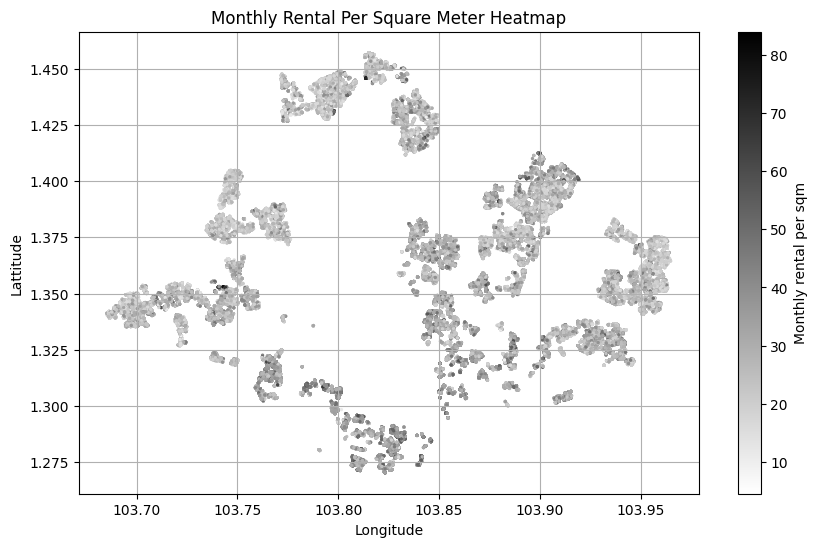

In [165]:
plot_rental_heatmap(df_train)

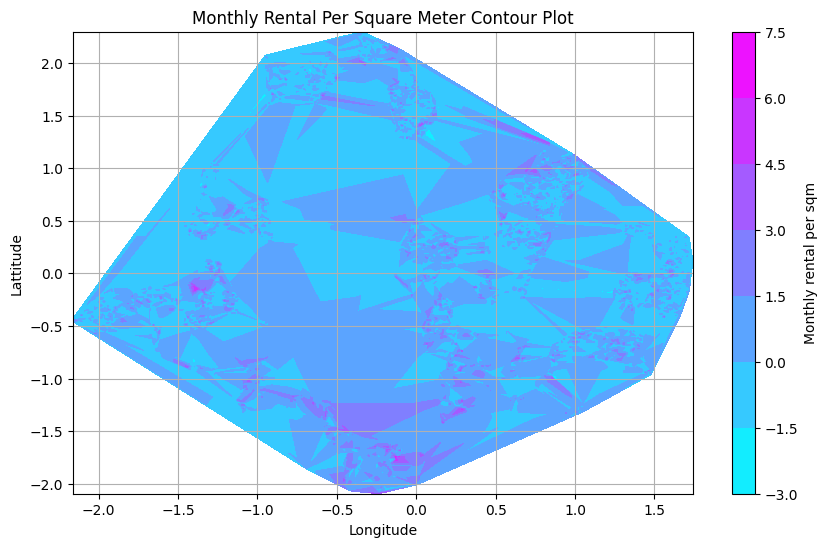

In [55]:
plot_rental_contour(df_train)

In [35]:
scaler = StandardScaler()
df_train[['latitude', 'longitude', 'rent_sqm']] = scaler.fit_transform(df_train[['latitude', 'longitude', 'rent_sqm']])

eps = 0.02
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_train[['latitude', 'longitude']])

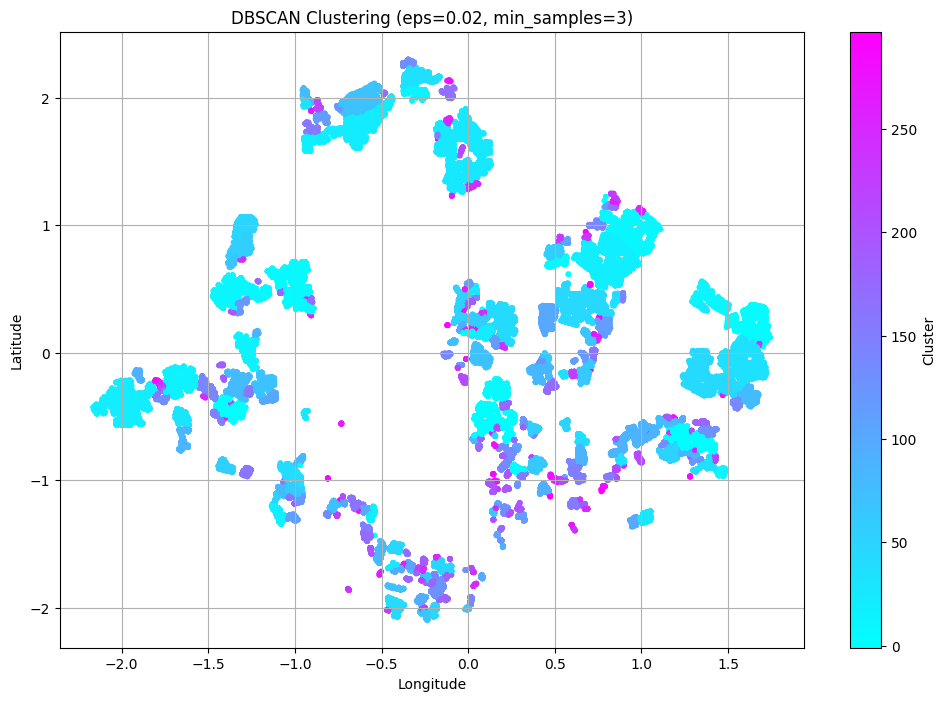

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(df_train['longitude'], df_train['latitude'], c=clusters, cmap='cool', marker='o', s=10)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.grid(True)
plt.show()

In [49]:
np.sort(clusters)

array([ -1,  -1,  -1, ..., 297, 297, 297], dtype=int64)

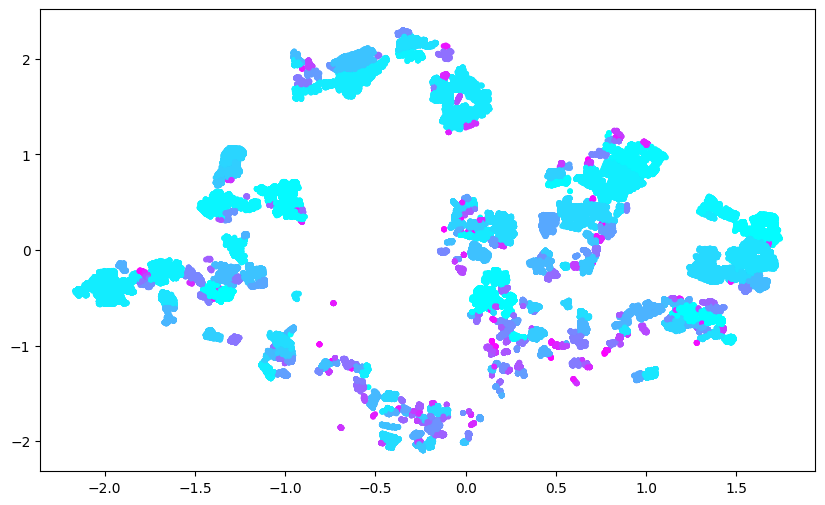

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(df_train['longitude'], df_train['latitude'], c=clusters, cmap='cool', s=10)
plt.show()

In [92]:
df_stock = pd.read_csv("./data/auxiliary-data/sg-stock-prices.csv")

In [93]:
df_stock['date'] = pd.to_datetime(df_stock['date'])

In [61]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35498 entries, 0 to 35497
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            35498 non-null  object 
 1   symbol          35498 non-null  object 
 2   date            35498 non-null  object 
 3   open            35498 non-null  float64
 4   high            35498 non-null  float64
 5   low             35498 non-null  float64
 6   close           35498 non-null  float64
 7   adjusted_close  35498 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.2+ MB


In [59]:
df_stock['name'].unique()

array(['DBS Group', 'OCBC Bank', 'UOB', 'Singtel', 'Sea (Garena)',
       'Wilmar International', 'Singapore Airlines', 'Grab Holdings',
       'CapitaLand Investment Limited', 'Flex',
       'Jardine Cycle & Carriage', 'CapitaLand Mall Trust',
       'Ascendas Reit', 'ST Engineering', 'Keppel', 'Genting Singapore',
       'Singapore Exchange', 'Seatrium', 'Sembcorp', 'Great Eastern',
       'Mapletree Logistics Trust', 'Mapletree Commercial Trust',
       'BOC Aviation', 'Mapletree Industrial Trust', 'City Developments',
       'UOL Group', 'Olam', 'Frasers Logistics & Industrial Trust',
       'Kulicke and Soffa Industries', 'Venture Corporation', 'SATS',
       'Suntec REIT', 'NetLink Trust', 'Keppel REIT',
       'CapitaLand Ascott Trust', 'Singapore Land', 'ComfortDelGro',
       'Golden Agri-Resources', 'HPH Trust (Hutchison Port)',
       'Kenon Holdings', 'Yanlord', 'TDCX', 'Singapore Post', 'Karooooo',
       'Maxeon Solar Technologies', 'Riverstone Holdings', 'PropertyGuru',


In [58]:
df_stock[df_stock['name'] == 'DBS Group']

,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707
...,...,...,...,...,...,...,...,...
641,DBS Group,D05.SI,2023-07-24,32.74,32.79,32.33,32.44,32.440
642,DBS Group,D05.SI,2023-07-25,32.36,32.82,32.26,32.75,32.750
643,DBS Group,D05.SI,2023-07-26,32.69,33.34,32.69,33.16,33.160
644,DBS Group,D05.SI,2023-07-27,33.59,33.92,33.45,33.76,33.760


In [60]:
df_stock[df_stock['name'] == 'OCBC Bank']

,name,symbol,date,open,high,low,close,adjusted_close
646,OCBC Bank,O39.SI,2021-01-04,10.06,10.12,10.02,10.10,9.036
647,OCBC Bank,O39.SI,2021-01-05,10.01,10.06,9.96,10.06,9.000
648,OCBC Bank,O39.SI,2021-01-06,10.08,10.09,10.01,10.09,9.027
649,OCBC Bank,O39.SI,2021-01-07,10.20,10.33,10.17,10.32,9.233
650,OCBC Bank,O39.SI,2021-01-08,10.46,10.73,10.46,10.73,9.599
...,...,...,...,...,...,...,...,...
1287,OCBC Bank,O39.SI,2023-07-24,12.70,12.72,12.55,12.64,12.640
1288,OCBC Bank,O39.SI,2023-07-25,12.70,12.77,12.64,12.71,12.710
1289,OCBC Bank,O39.SI,2023-07-26,12.76,12.90,12.71,12.84,12.840
1290,OCBC Bank,O39.SI,2023-07-27,12.94,13.08,12.91,13.07,13.070


In [95]:
df_stock = df_stock.set_index('date')

In [96]:
df_stock['date'] = df_stock.index.strftime('%Y-%m')

In [98]:
df_stock = df_stock.set_index('date')
df_stock

,name,symbol,open,high,low,close,adjusted_close
date,,,,,,,
2021-01,DBS Group,D05.SI,25.130,25.340,25.010,25.340,22.833
2021-01,DBS Group,D05.SI,25.220,25.350,25.090,25.350,22.842
2021-01,DBS Group,D05.SI,25.300,25.350,25.070,25.180,22.689
2021-01,DBS Group,D05.SI,25.680,26.180,25.630,26.050,23.473
2021-01,DBS Group,D05.SI,26.550,27.470,26.500,27.420,24.707
...,...,...,...,...,...,...,...
2023-07,Triterras,TRIRF,0.001,0.001,0.001,0.001,0.001
2023-07,Triterras,TRIRF,0.001,0.001,0.001,0.001,0.001
2023-07,Triterras,TRIRF,0.001,0.110,0.001,0.001,0.001


In [132]:
df_train = pd.read_csv("./data/train.csv")

In [133]:
# Group by Year-Month and calculate the average price for each stock
monthly_avg_prices = df_stock.groupby(['date', 'name'])['adjusted_close'].mean().reset_index()

# Pivot the data to create a DataFrame with stocks as columns and Year-Month as index
monthly_avg_prices_pivot = monthly_avg_prices.pivot(index='date', columns='name', values='adjusted_close')


df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train = df_train.set_index('rent_approval_date')
df_train['rent_approval_date'] = df_train.index.strftime('%Y-%m')
df_train = df_train.set_index('rent_approval_date')

average_rental = df_train.groupby(df_train.index)['monthly_rent'].mean().reset_index()
average_rental = average_rental.set_index('rent_approval_date')

# Merge the two dataframes based on the Year-Month index
merged_data = monthly_avg_prices_pivot.join(average_rental)

correlations = merged_data.corr()

# Print the correlation matrix
print(correlations)

                                       ASLAN Pharmaceuticals  Ascendas Reit  \
ASLAN Pharmaceuticals                               1.000000       0.191933   
Ascendas Reit                                       0.191933       1.000000   
BOC Aviation                                        0.291816       0.089112   
CMON                                                0.284560       0.075114   
CapitaLand Ascott Trust                            -0.637761       0.214100   
CapitaLand Investment Limited                      -0.490522       0.053227   
CapitaLand Mall Trust                              -0.397238       0.131999   
City Developments                                  -0.387324      -0.316413   
ComfortDelGro                                       0.787997       0.030755   
CytoMed Therapeutics                               -0.889920       0.701046   
DBS Group                                          -0.818357      -0.126277   
Flex                                               -

In [134]:
merged_data

,ASLAN Pharmaceuticals,Ascendas Reit,BOC Aviation,CMON,CapitaLand Ascott Trust,CapitaLand Investment Limited,CapitaLand Mall Trust,City Developments,ComfortDelGro,CytoMed Therapeutics,...,Suntec REIT,TDCX,Triterras,UOB,UOL Group,Venture Corporation,Wave Life Sciences,Wilmar International,Yanlord,monthly_rent
date,,,,,,,,,,,,,,,,,,,,,
2020-12,9.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.030000,NaN,NaN,NaN,7.870000,NaN,NaN,NaN
2021-01,10.401316,2.658000,59.424900,0.074000,0.926400,NaN,1.962150,7.186250,1.527200,NaN,...,1.307050,NaN,9.676053,20.577250,7.334950,17.928300,9.478947,4.684600,1.014950,2152.142513
2021-02,17.276316,2.667789,61.730833,0.074278,0.885158,NaN,1.868053,6.955842,1.453053,NaN,...,1.295737,NaN,7.619474,20.847842,7.086579,17.909895,10.474211,4.861263,1.004474,2146.756152
2021-03,19.139130,2.605304,69.861870,0.067739,0.935696,NaN,1.879130,7.344000,1.533652,NaN,...,1.335217,NaN,7.300435,22.312696,7.281565,17.560826,8.999130,4.802609,1.054435,2167.458384
2021-04,16.102381,2.705524,66.269474,0.063632,0.942857,NaN,1.924762,7.728000,1.619714,NaN,...,1.365000,NaN,7.618095,22.892762,7.534810,18.250381,6.199048,4.868524,1.159190,2182.674772
2021-05,14.232500,2.619421,64.128450,0.060850,0.891526,NaN,1.821842,7.285895,1.518000,NaN,...,1.286842,NaN,5.900500,22.993263,7.200421,17.217158,6.340000,4.427947,1.214421,2216.537301
2021-06,16.445455,2.622591,62.951333,0.054238,0.895545,NaN,1.860091,7.252455,1.534682,NaN,...,1.292909,NaN,6.525000,23.026818,7.167591,17.318273,7.030455,4.240773,1.171000,2223.939114
2021-07,14.816667,2.701619,58.002190,0.043524,0.907286,NaN,1.868571,6.686524,1.479429,NaN,...,1.317952,NaN,5.689048,23.047238,7.140190,17.462667,6.456190,4.097286,1.095571,2252.984718
2021-08,13.581818,2.778476,55.753273,0.041182,0.907429,NaN,1.905143,6.618143,1.495619,NaN,...,1.298571,NaN,5.265909,23.541000,6.997619,17.677048,5.914091,3.965810,1.089810,2249.901768


In [128]:
average_rental

,rent_approval_date,monthly_rent
0,2021-01,2152.142513
1,2021-02,2146.756152
2,2021-03,2167.458384
3,2021-04,2182.674772
4,2021-05,2216.537301
5,2021-06,2223.939114
6,2021-07,2252.984718
7,2021-08,2249.901768
8,2021-09,2233.926780
9,2021-10,2261.516035


In [135]:
correlations

,ASLAN Pharmaceuticals,Ascendas Reit,BOC Aviation,CMON,CapitaLand Ascott Trust,CapitaLand Investment Limited,CapitaLand Mall Trust,City Developments,ComfortDelGro,CytoMed Therapeutics,...,Suntec REIT,TDCX,Triterras,UOB,UOL Group,Venture Corporation,Wave Life Sciences,Wilmar International,Yanlord,monthly_rent
ASLAN Pharmaceuticals,1.000000,0.191933,0.291816,0.284560,-0.637761,-0.490522,-0.397238,-0.387324,0.787997,-0.889920,...,-0.457401,0.844947,0.823775,-0.807325,0.493030,0.625372,0.780058,0.707750,0.426651,-0.741208
Ascendas Reit,0.191933,1.000000,0.089112,0.075114,0.214100,0.053227,0.131999,-0.316413,0.030755,0.701046,...,-0.223425,-0.055462,0.125448,-0.106241,0.194205,0.167833,0.146819,0.011829,-0.191191,0.072250
BOC Aviation,0.291816,0.089112,1.000000,0.030038,0.161941,0.192097,0.026278,0.096545,0.247029,0.616104,...,-0.153172,0.025623,0.207612,-0.112000,0.518962,0.191520,0.270132,0.439295,0.112982,-0.120383
CMON,0.284560,0.075114,0.030038,1.000000,-0.408967,-0.340453,-0.007755,-0.299900,0.431270,-0.181352,...,0.046013,0.919291,0.469295,-0.293167,0.172930,0.356105,0.057216,0.190150,0.405322,-0.613865
CapitaLand Ascott Trust,-0.637761,0.214100,0.161941,-0.408967,1.000000,0.731755,0.713770,0.424134,-0.486874,0.380840,...,0.542211,-0.628912,-0.659742,0.562436,0.076356,-0.468119,-0.570019,-0.299289,-0.315383,0.585654
CapitaLand Investment Limited,-0.490522,0.053227,0.192097,-0.340453,0.731755,1.000000,0.804063,0.625453,-0.038396,0.001423,...,0.689624,-0.393748,-0.472645,0.506865,0.563818,0.078138,-0.496246,0.491044,0.385703,0.122199
CapitaLand Mall Trust,-0.397238,0.131999,0.026278,-0.007755,0.713770,0.804063,1.000000,0.440220,-0.041642,-0.019721,...,0.756089,-0.127396,-0.262892,0.377178,0.300242,-0.158195,-0.461075,0.059211,0.118605,0.094829
City Developments,-0.387324,-0.316413,0.096545,-0.299900,0.424134,0.625453,0.440220,1.000000,-0.119000,0.388368,...,0.502768,-0.287286,-0.335766,0.342483,0.059508,0.028773,-0.237315,-0.031109,0.211303,0.295215
ComfortDelGro,0.787997,0.030755,0.247029,0.431270,-0.486874,-0.038396,-0.041642,-0.119000,1.000000,0.991148,...,0.002723,0.540269,0.866460,-0.778887,0.704908,0.614078,0.473712,0.663490,0.684784,-0.920683
CytoMed Therapeutics,-0.889920,0.701046,0.616104,-0.181352,0.380840,0.001423,-0.019721,0.388368,0.991148,1.000000,...,0.036822,-0.986054,-0.882963,0.271293,0.279560,-0.046288,0.341097,-0.657288,-0.254963,0.504586


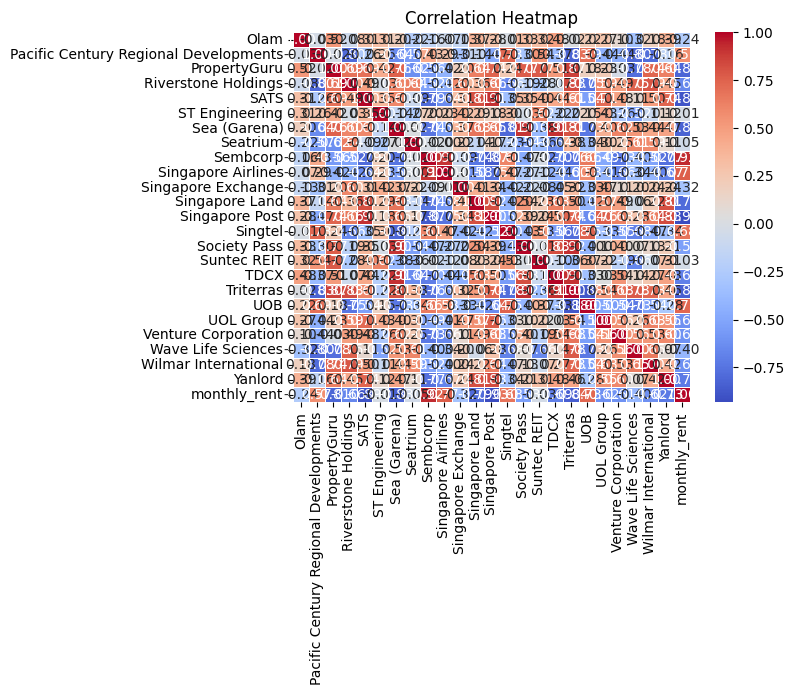

In [143]:
sns.heatmap(correlations.iloc[-25:,-25:], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [166]:
correlations.iloc[:-1,-1].mean()

-0.1735849282810561